In [ ]:
Histograms

Objectives

Visualize the distribution of data using histograms.

Visualize relationships between features.

Explore data composition and comparisons.

In [ ]:
Demo: Working with database

In [1]:
!pip install pandas
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
r = requests.get(url)
with open("survey-data.sqlite", "wb") as f:
    f.write(r.content)
print("Download complete.")


Download complete.


In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

In [ ]:
Basic SQL queries
Demo 1: Count the number of rows in the table

In [13]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


In [14]:
# Demo 2: List all tables
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [15]:
#Demo 3: Group data by age

QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [ ]:
Hands-on Lab: Visualizing Data with Histograms

In [ ]:
 Visualizing the distribution of data (Histograms)
1.1 Histogram of CompTotal (Total Compensation)

Objective: Plot a histogram of CompTotal to visualize the distribution of respondents' total compensation.


In [5]:
# Connect to SQLite and load data into pandas
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')
# Check table names
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


   name
0  main


In [10]:
import sqlite3
import pandas as pd

# Connect to the database (if not already connected)
conn = sqlite3.connect("survey-data.sqlite")

# List all table names
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


   name
0  main


In [17]:
# Read all rows from the 'main' table
df = pd.read_sql("SELECT * FROM main", conn)

# Preview the columns
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [ ]:
# Plot histogram of CompTotal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.xlim(0, 300000)  # Optional: limit x-axis for better visualization
plt.show()


In [ ]:
1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)

Objective: Plot a histogram of YearsCodePro to analyze the distribution of coding experience among respondents.



In [18]:
#  Clean and convert the YearsCodePro column
import pandas as pd
import matplotlib.pyplot as plt

# Replace text with numeric equivalents
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert to numeric (other entries should already be numeric strings)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')


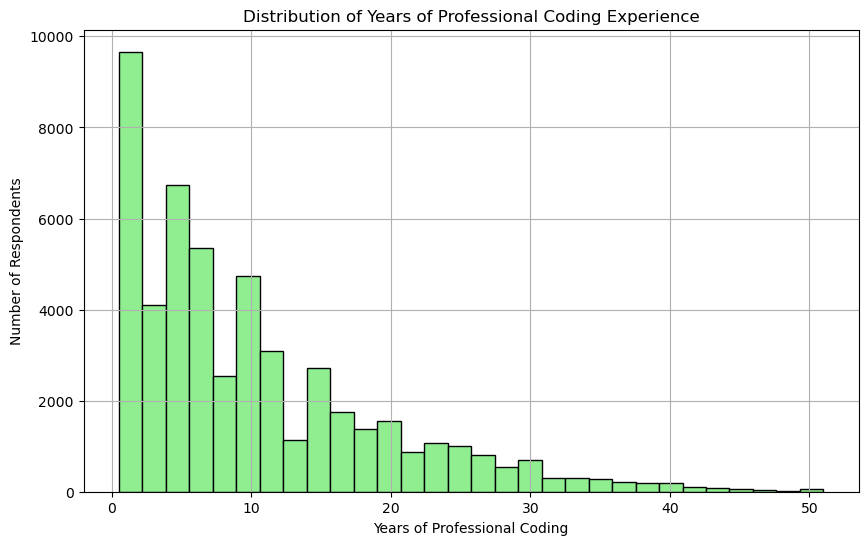

In [19]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


In [ ]:
2. Visualizing Relationships in Data
2.1 Histogram Comparison of CompTotal by Age Group

Objective: Use histograms to compare the distribution of CompTotal across different Age groups.



In [20]:
# CHECK THE UNIQUE AGE CATEGORIES
print(df['Age'].unique())


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


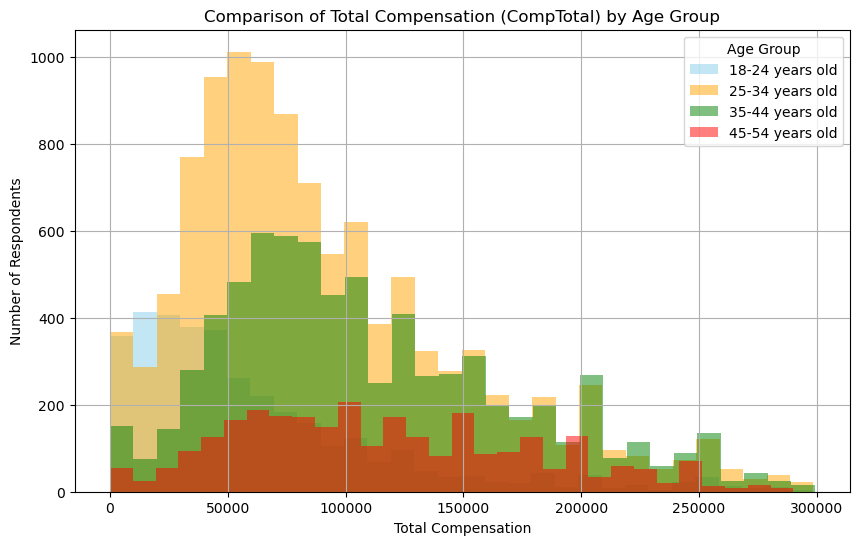

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean and convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Filter out extremely high values to avoid distortion
df_filtered = df[df['CompTotal'] < 300000]

# Define age groups to compare
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
colors = ['skyblue', 'orange', 'green', 'red']

# Plot histograms
plt.figure(figsize=(10, 6))

for age, color in zip(age_groups, colors):
    subset = df_filtered[df_filtered['Age'] == age]
    plt.hist(subset['CompTotal'].dropna(), bins=30, alpha=0.5, label=age, color=color)

plt.title('Comparison of Total Compensation (CompTotal) by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()


In [ ]:
Histogram of TimeSearching for Different Age Groups

Objective: Use histograms to explore the distribution of TimeSearching (time spent searching for information) for respondents across different age groups.


[None '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


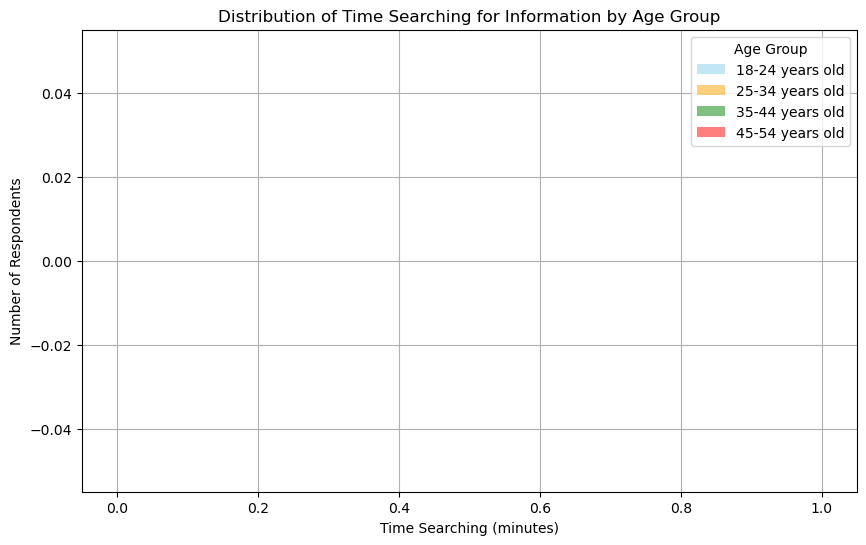

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to SQLite and load the data
conn = sqlite3.connect("survey-data.sqlite")  # Adjust the path if needed
df = pd.read_sql("SELECT * FROM main", conn)

# Step 2: Check the unique values of TimeSearching (optional)
print(df['TimeSearching'].unique())

# Step 3: Convert TimeSearching to numeric
# If values are already numeric, this won't change them. If not, it handles conversion.
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# Step 4: Define age groups to visualize
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
colors = ['skyblue', 'orange', 'green', 'red']

# Step 5: Plot overlaid histograms
plt.figure(figsize=(10, 6))

for age, color in zip(age_groups, colors):
    subset = df[df['Age'] == age]
    plt.hist(subset['TimeSearching'].dropna(), bins=20, alpha=0.5, label=age, color=color)

plt.title('Distribution of Time Searching for Information by Age Group')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()


In [ ]:
3. Visualizing the Composition of Data
3.1 Histogram of Most Desired Databases (DatabaseWantToWorkWith)

Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.

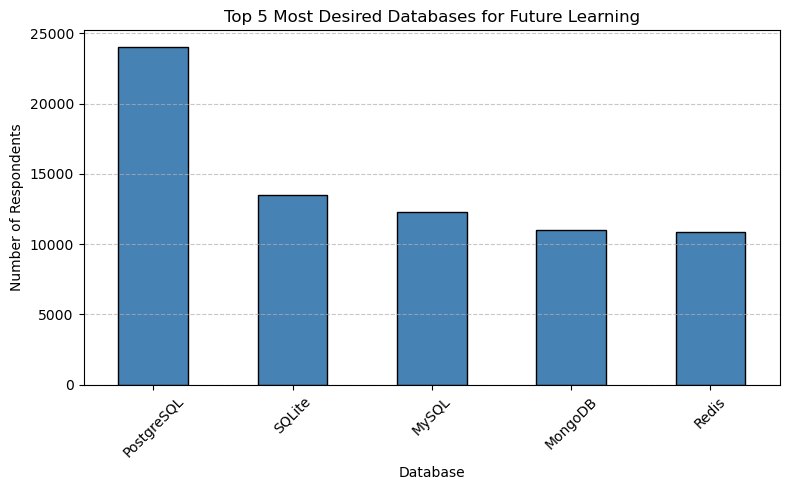

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect and load the data
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql("SELECT * FROM main", conn)

# Step 2: Check for the relevant column
if 'DatabaseWantToWorkWith' not in df.columns:
    print("Column 'DatabaseWantToWorkWith' not found.")
else:
    # Step 3: Drop NaN and split multiple selections (comma-separated)
    db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')

    # Step 4: Flatten the list and count each database
    db_flat = db_series.explode().str.strip()
    db_counts = db_flat.value_counts().head(5)

    # Step 5: Plot the histogram
    plt.figure(figsize=(8, 5))
    db_counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Top 5 Most Desired Databases for Future Learning')
    plt.xlabel('Database')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
3.2 Histogram of Preferred Work Locations (RemoteWork)

Objective: Use a histogram to explore the distribution of preferred work arrangements (remote work).



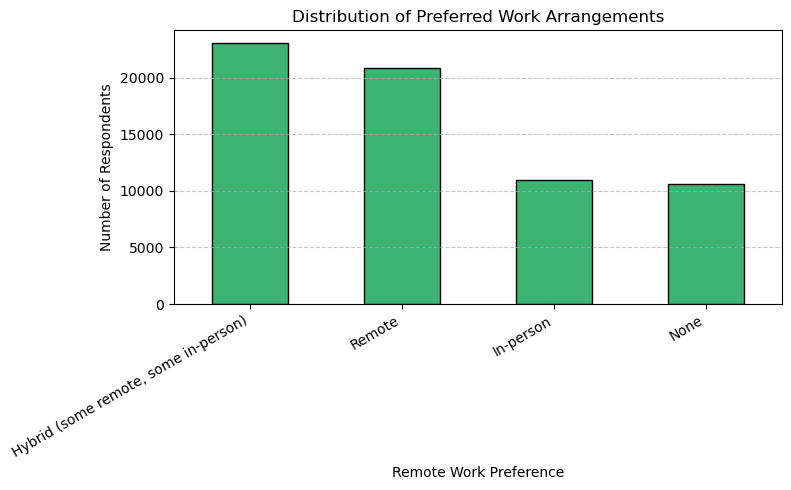

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database and load the table
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql("SELECT * FROM main", conn)

# Step 2: Check if 'RemoteWork' column exists
if 'RemoteWork' not in df.columns:
    print("Column 'RemoteWork' not found in the dataset.")
else:
    # Step 3: Count the frequency of each response
    remote_counts = df['RemoteWork'].value_counts(dropna=False)

    # Step 4: Plot the bar chart
    plt.figure(figsize=(8, 5))
    remote_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
    plt.title('Distribution of Preferred Work Arrangements')
    plt.xlabel('Remote Work Preference')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [ ]:
4. Visualizing Comparison of Data
4.1 Histogram of Median CompTotal for Ages 45 to 60

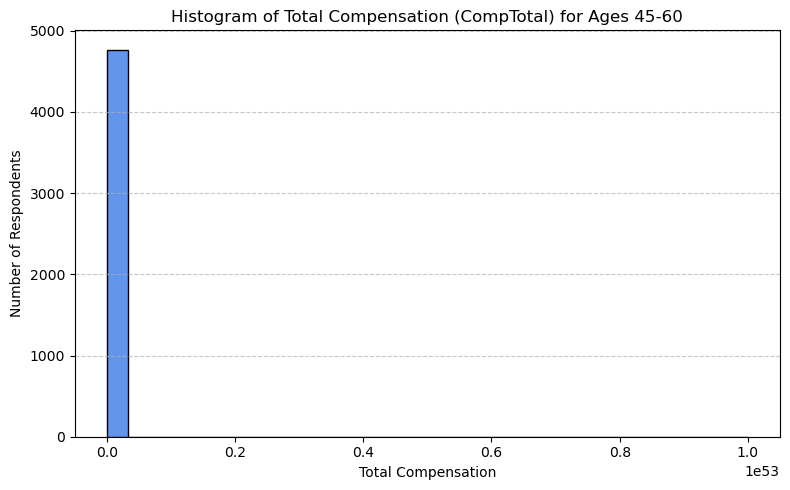

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# Connect to the database and load data
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql("SELECT * FROM main", conn)

# Step 1: Define age groups corresponding roughly to 45-60
age_groups = ['45-54 years old', '55-64 years old']

# Step 2: Filter data for these age groups
df_age_filtered = df[df['Age'].isin(age_groups)]

# Step 3: Clean CompTotal column (convert to numeric, drop NaNs and zero/negative values)
df_age_filtered.loc[:, 'CompTotal'] = pd.to_numeric(df_age_filtered['CompTotal'], errors='coerce')
df_age_filtered = df_age_filtered[df_age_filtered['CompTotal'] > 0]

# Step 4: Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_age_filtered['CompTotal'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal) for Ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
4.2 Histogram of Job Satisfaction (JobSat) by YearsCodePro

Objective: Plot the histogram for JobSat scores based on respondents' years of professional coding experience.

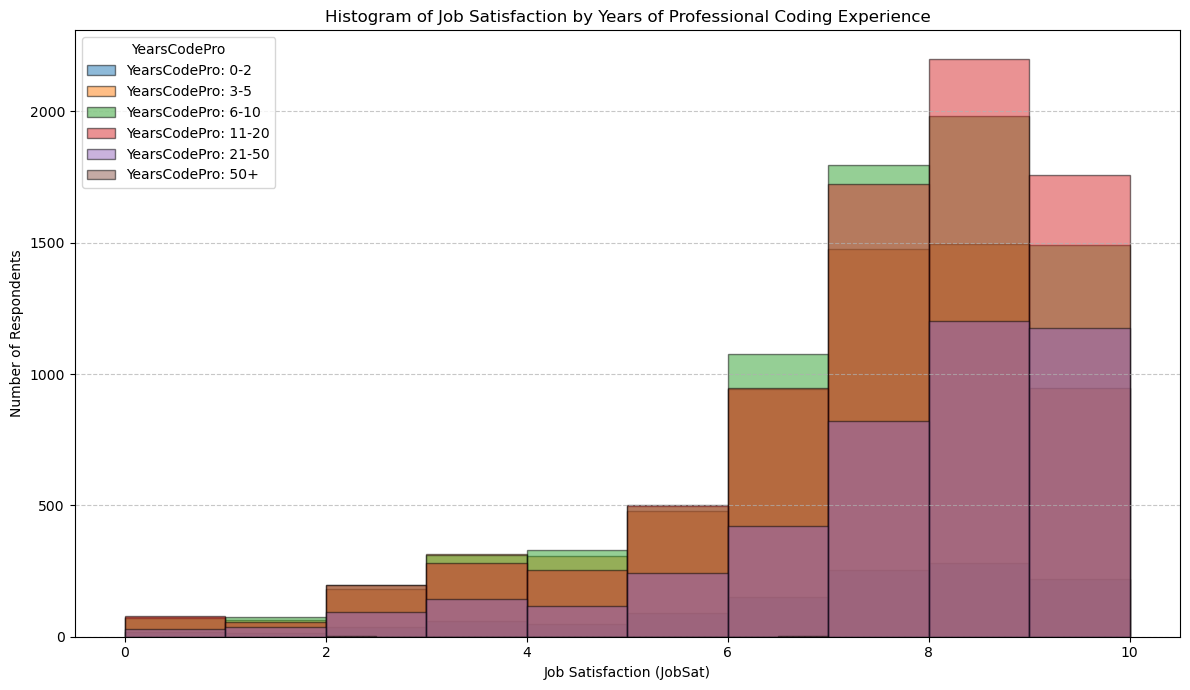

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# Connect to SQLite DB and load data
conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql("SELECT * FROM main", conn)

# Convert YearsCodePro and JobSat to numeric (coerce errors to NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing JobSat or YearsCodePro
df_clean = df_clean.copy()
df_clean['YearsCodeProBin'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)


# Bin YearsCodePro into groups for easier visualization
bins = [0, 2, 5, 10, 20, 50, 100]  # customize as needed
labels = ['0-2', '3-5', '6-10', '11-20', '21-50', '50+']
df_clean.loc[:, 'YearsCodeProBin'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)

# Plot histogram of JobSat for each YearsCodePro bin
plt.figure(figsize=(12, 7))

for label in labels:
    subset = df_clean[df_clean['YearsCodeProBin'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=f'YearsCodePro: {label}', edgecolor='black')

plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction (JobSat)')
plt.ylabel('Number of Respondents')
plt.legend(title='YearsCodePro')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
Close the database connection

In [42]:
conn.close()